## STA7722 Assignment1 Part B 2.3
### a) There are the datasets 'gmm1.csv' and 'gmm2.csv'. Train a GMM for each dataset.
### b) There is a datasets 'gmmUknown.csv', that has data coming from either 'gmm1.csv' or 'gmm2.csv'. Which one is it and why?
### c) The dataset 'gmmUknownComposite.csv' has data from both 'gmm1.csv' and 'gmm2.csv'. Produce a plot with the support for each plot over the 1000points and where you believe there is a change of the mixture producing the data.

### Solutions:
### a) There are the datasets 'gmm1.csv' and 'gmm2.csv'. Train a GMM for each dataset.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [55]:
#read data
df1 = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmm1.csv")
df2 = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmm2.csv")
uk = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmmUknown.csv")
ukc = pd.read_csv("C:/Work/Project/STA7722/Assignment/Assgn1/gmmUknownComposite.csv")

In [72]:
#fit gmm1
gm1 = GaussianMixture(n_components=1, random_state=0).fit(df1) #,covariance_type='full'
print("mean:")
print(gm1.means_)
print("std:")
print(np.sqrt(gm1.covariances_))

mean:
[[3.30109779]]
std:
[[[2.36047781]]]


C:\Users\alice\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [73]:
#fit gmm2
gm2 = GaussianMixture(n_components=1, random_state=0).fit(df2) #,covariance_type='full'
print("mean:")
print(gm2.means_)
print("std:")
print(np.sqrt(gm2.covariances_))

mean:
[[4.5990759]]
std:
[[[2.43930314]]]


C:\Users\alice\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


### b) There is a datasets 'gmmUknown.csv', that has data coming from either 'gmm1.csv' or 'gmm2.csv'. Which one is it and why?

### gmmUknown belongs to gmm2 because the distance is closer to gmm2 compared with gmm1

In [54]:
#fit gmm2
uk2 = GaussianMixture(n_components=1, random_state=0).fit(uk) #,covariance_type='full'
print("mean:")
print(uk2.means_)
print("std:")
print(np.sqrt(uk2.covariances_))

mean:
[[4.46321568]]
std:
[[[2.40564779]]]


C:\Users\alice\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### c) The dataset 'gmmUknownComposite.csv' has data from both 'gmm1.csv' and 'gmm2.csv'. Produce a plot with the support for each plot over the 1000points and where you believe there is a change of the mixture producing the data.

In [64]:
#Combine df1 and df2
#df = pd.concat([df1,df2.rename(columns={'v2':'v1'}),ukc.rename(columns={'vUnknownComposite':'v1'})], ignore_index=True)
df = pd.concat([df1,df2,ukc], axis =1)

In [65]:
df.tail()

,v1,v2,vUnknownComposite
995,2.250978,-1.177236,6.136464
996,1.575479,4.737833,5.997531
997,7.684647,5.819119,4.915746
998,3.453344,6.876971,5.281205
999,4.433550,4.341987,7.589621


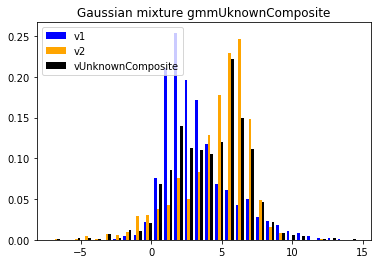

In [71]:
hx, hy, _ = plt.hist(df, bins=30, density=1, color = ["Blue","Orange","Black"])
plt.title('Gaussian mixture gmmUknownComposite')
plt.legend(["v1","v2","vUnknownComposite"])
plt.show()